In [64]:
import pandas as pd

In [198]:
from sklearn.preprocessing import MinMaxScaler
def scaler(dataset):
    scaler = MinMaxScaler(feature_range=(-1,1)) input_data[target].shift(-1)
    dataset['sentiment'] = scaler.fit_transform(dataset['sentiment'].values.reshape(-1,1))
    dataset['log_change'] = scaler.fit_transform(dataset['log_change'].values.reshape(-1,1))
    return dataset

In [183]:
dataset_in = pd.read_csv('GOOG_PRICE_NEWS.csv')
dataset_in.iloc[:] = dataset_in.iloc[::-1].values
DATASET = dataset_in

In [240]:
DATASET

,volume,timestamp,high,low,close,open,date,log_change,neg_target,pos_target,WALL_STREE.text_COUNT_last1days:google,WALL_STREE.text_last1days:google
0,4018300,1.396544e+09,588.3000,566.010,571.50,573.39,03-04-2014 17:00:00,-0.003302,1,0,2,['steve jobs described apples rivalry with goo...
1,3961600,1.396890e+09,549.8500,530.530,540.63,544.79,07-04-2014 17:00:00,-0.007665,1,0,1,['google appeals youtube blackout in turkish c...
2,3031600,1.397063e+09,567.8000,555.380,567.04,565.84,09-04-2014 17:00:00,0.002118,0,1,1,"['google checks in to the hotel business, addi..."
3,5614700,1.397754e+09,557.0000,539.400,543.34,556.32,17-04-2014 17:00:00,-0.023608,1,0,6,['follow our live blog of googles q1 earnings ...
4,2331100,1.398186e+09,547.9950,536.000,545.50,536.00,22-04-2014 17:00:00,0.017569,0,1,2,"['in 2007, sergey brin wrote to google execs, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
473,996768,1.607447e+09,1815.9700,1791.280,1811.33,1808.52,08-12-2020 17:00:00,0.001553,0,1,1,['democratic sen ron wyden asked google chief ...
474,1434416,1.607620e+09,1774.9900,1733.527,1767.65,1762.60,10-12-2020 17:00:00,0.002861,0,1,3,['google told advertisers it is planning to li...
475,1068292,1.608052e+09,1764.0000,1741.670,1761.08,1759.86,15-12-2020 17:00:00,0.000693,1,0,1,['google will test an option for employees to ...
476,1744005,1.608224e+09,1766.7100,1731.150,1740.51,1763.93,17-12-2020 17:00:00,-0.013366,1,0,2,['a pair of sweeping antitrust lawsuits agains...


In [17]:
import nltk
#import vader from nltk to predict sentement from pre build model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ruari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [185]:
from ast import literal_eval
s_scores = []
#do some sentiment predction on twitter dataset
for index in range(len(DATASET['WALL_STREE.text_last1days:google'])): 
    score = 0
    for item in literal_eval(DATASET['WALL_STREE.text_last1days:google'][index]):
        result = sid.polarity_scores(item)
        score += result['compound']
    s_scores.append(score)
    #index
s_scores

[-0.7773000000000001,
 0.0,
 0.0,
 0.9532,
 -0.23740000000000006,
 0.6666,
 0.0258,
 0.0,
 -0.6124,
 0.0,
 0.0,
 -0.023999999999999994,
 0.0,
 0.3818,
 -0.0258,
 0.4739000000000001,
 0.3182,
 -0.9380000000000001,
 0.3558,
 0.1779,
 0.0772,
 0.5106,
 0.9508,
 0.0,
 0.1779,
 0.0,
 0.128,
 0.0,
 0.296,
 0.17559999999999998,
 -0.2263,
 0.3612,
 0.4404,
 0.2732,
 0.4019,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.1027,
 -0.0772,
 1.2854999999999999,
 -0.5574,
 0.2263,
 0.0,
 -0.3612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2263,
 -0.34,
 -0.1027,
 -0.3818,
 0.0772,
 0.0752,
 -0.0516,
 0.0,
 0.5106,
 -0.25510000000000005,
 0.0,
 0.0,
 -0.6597,
 -0.6597,
 -0.5045999999999999,
 0.4927,
 0.0,
 -0.1027,
 -0.0129,
 -0.4404,
 0.5267,
 -0.0516,
 0.0,
 0.7845,
 0.296,
 0.0,
 0.4019,
 0.1779,
 0.2023,
 0.0,
 0.0,
 -0.2732,
 -0.36569999999999997,
 0.3612,
 0.34,
 0.34,
 0.0,
 0.0,
 0.0,
 0.3182,
 1.4559,
 1.1988,
 0.0,
 -0.7184,
 0.0,
 0.0,
 0.0,
 1.0341,
 -0.1027,
 0.0,
 0.0,
 0.0,
 0.1027,
 -0.296,
 0.12869999999999998

In [192]:
vader_dataset = DATASET.copy()

In [193]:
vader_dataset.loc[:,'sentiment'] = s_scores

In [199]:
scaler(vader_dataset)

,volume,timestamp,high,low,close,open,date,log_change,neg_target,pos_target,WALL_STREE.text_COUNT_last1days:google,WALL_STREE.text_last1days:google,sentiment
0,4018300,1.396544e+09,588.3000,566.010,571.50,573.39,03-04-2014 17:00:00,0.166128,1,0,2,['steve jobs described apples rivalry with goo...,-0.581712
1,3961600,1.396890e+09,549.8500,530.530,540.63,544.79,07-04-2014 17:00:00,0.071418,1,0,1,['google appeals youtube blackout in turkish c...,-0.054836
2,3031600,1.397063e+09,567.8000,555.380,567.04,565.84,09-04-2014 17:00:00,0.283769,0,1,1,"['google checks in to the hotel business, addi...",-0.054836
3,5614700,1.397754e+09,557.0000,539.400,543.34,556.32,17-04-2014 17:00:00,-0.274617,1,0,6,['follow our live blog of googles q1 earnings ...,0.591270
4,2331100,1.398186e+09,547.9950,536.000,545.50,536.00,22-04-2014 17:00:00,0.619104,0,1,2,"['in 2007, sergey brin wrote to google execs, ...",-0.215753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,996768,1.607447e+09,1815.9700,1791.280,1811.33,1808.52,08-12-2020 17:00:00,0.271485,0,1,1,['democratic sen ron wyden asked google chief ...,-0.054836
474,1434416,1.607620e+09,1774.9900,1733.527,1767.65,1762.60,10-12-2020 17:00:00,0.299884,0,1,3,['google told advertisers it is planning to li...,-0.793059
475,1068292,1.608052e+09,1764.0000,1741.670,1761.08,1759.86,15-12-2020 17:00:00,0.252829,1,0,1,['google will test an option for employees to ...,-0.054836
476,1744005,1.608224e+09,1766.7100,1731.150,1740.51,1763.93,17-12-2020 17:00:00,-0.052315,1,0,2,['a pair of sweeping antitrust lawsuits agains...,-0.313834


<AxesSubplot:ylabel='Frequency'>

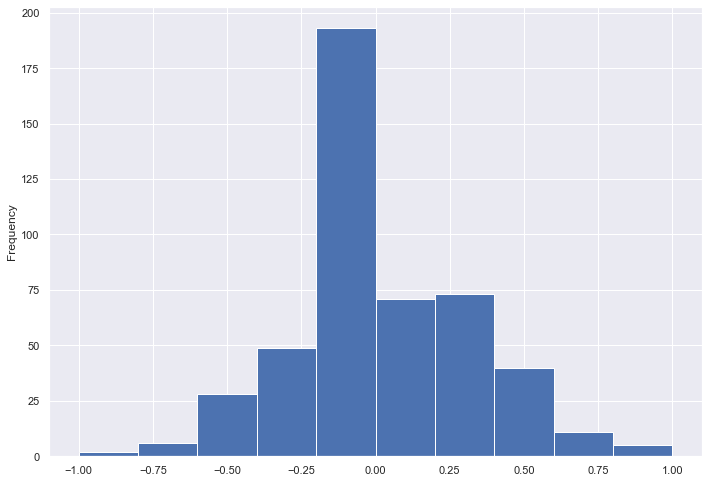

In [236]:
vader_dataset['sentiment'].plot.hist()

In [164]:
vader_dataset.to_csv("GOOG_PRICE_VADER_SEMANTIC_ENRICHED.csv", index=False)

In [88]:
#get flair
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-03-30 18:03:44,013 loading file C:\Users\Ruari\.flair\models\sentiment-en-mix-distillbert_4.pt


In [201]:
s_scores = []
#do some sentiment predction on twitter dataset
for index in range(len(DATASET['WALL_STREE.text_last1days:google'])): 
    score = 0
    for item in literal_eval(DATASET['WALL_STREE.text_last1days:google'][index]):
        sentence = flair.data.Sentence(item)
        sentiment_model.predict(sentence)
        if(sentence.labels[0].value == 'NEGATIVE'):
            score += sentence.labels[0].score * -1
        else:
            score += sentence.labels[0].score
    s_scores.append(score)
s_scores    

[-1.842341959476471,
 -0.997195839881897,
 -0.9777464866638184,
 -4.046672582626343,
 -1.9933833479881287,
 0.9175527095794678,
 0.9025084972381592,
 -0.9965870380401611,
 -0.9999102354049683,
 -0.022076845169067383,
 -0.9134266376495361,
 -0.20445990562438965,
 -1.9133760929107666,
 -1.990875482559204,
 -2.99897038936615,
 -0.985672652721405,
 -1.0451506972312927,
 -3.533846616744995,
 -2.9164671897888184,
 -0.9878546595573425,
 -1.474522590637207,
 -0.9300937056541443,
 0.9933023452758789,
 -0.5249022245407104,
 -0.7912480235099792,
 -1.9537695050239563,
 -0.8479923009872437,
 -0.6927555799484253,
 -0.7789588570594788,
 -4.9995129108428955,
 -0.999874472618103,
 -0.9993158578872681,
 0.7669705152511597,
 0.9503020644187927,
 0.9724434018135071,
 -0.9994958639144897,
 0.9983919262886047,
 -0.9813508987426758,
 0.9648076891899109,
 -0.9815080761909485,
 -0.9375957250595093,
 0.002116680145263672,
 -0.9986526966094971,
 -1.5697970390319824,
 -1.9432153701782227,
 -0.9998303651809692,
 -

In [202]:
flair_dataset = DATASET.copy()

In [203]:
flair_dataset.loc[:,'sentiment'] = s_scores

In [204]:
scaler(flair_dataset)

,volume,timestamp,high,low,close,open,date,log_change,neg_target,pos_target,WALL_STREE.text_COUNT_last1days:google,WALL_STREE.text_last1days:google,sentiment
0,4018300,1.396544e+09,588.3000,566.010,571.50,573.39,03-04-2014 17:00:00,0.166128,1,0,2,['steve jobs described apples rivalry with goo...,-0.096981
1,3961600,1.396890e+09,549.8500,530.530,540.63,544.79,07-04-2014 17:00:00,0.071418,1,0,1,['google appeals youtube blackout in turkish c...,0.144749
2,3031600,1.397063e+09,567.8000,555.380,567.04,565.84,09-04-2014 17:00:00,0.283769,0,1,1,"['google checks in to the hotel business, addi...",0.150312
3,5614700,1.397754e+09,557.0000,539.400,543.34,556.32,17-04-2014 17:00:00,-0.274617,1,0,6,['follow our live blog of googles q1 earnings ...,-0.727467
4,2331100,1.398186e+09,547.9950,536.000,545.50,536.00,22-04-2014 17:00:00,0.619104,0,1,2,"['in 2007, sergey brin wrote to google execs, ...",-0.140182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,996768,1.607447e+09,1815.9700,1791.280,1811.33,1808.52,08-12-2020 17:00:00,0.271485,0,1,1,['democratic sen ron wyden asked google chief ...,0.150827
474,1434416,1.607620e+09,1774.9900,1733.527,1767.65,1762.60,10-12-2020 17:00:00,0.299884,0,1,3,['google told advertisers it is planning to li...,-0.426333
475,1068292,1.608052e+09,1764.0000,1741.670,1761.08,1759.86,15-12-2020 17:00:00,0.252829,1,0,1,['google will test an option for employees to ...,0.144634
476,1744005,1.608224e+09,1766.7100,1731.150,1740.51,1763.93,17-12-2020 17:00:00,-0.052315,1,0,2,['a pair of sweeping antitrust lawsuits agains...,-0.141233


<AxesSubplot:ylabel='Frequency'>

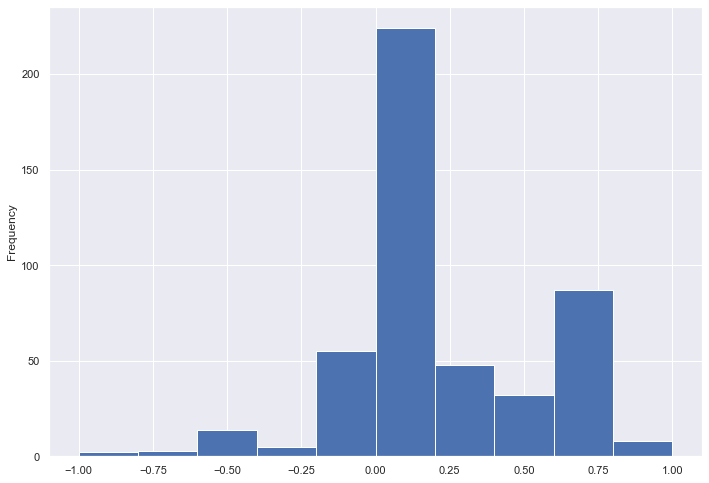

In [235]:
flair_dataset['sentiment'].plot.hist()

In [206]:
flair_dataset.to_csv("GOOG_PRICE_FLAIR_SEMANTIC_ENRICHED.csv", index=False)

# Using my model

In [232]:
#news prediction was done on google colab where the model was trained
myModel_dataset = pd.read_csv('GOOG_PRICE_MYMODEL_SEMANTIC_ENRICHED.csv')
myModel_dataset

,volume,timestamp,high,low,close,open,date,log_change,neg_target,pos_target,WALL_STREE.text_COUNT_last1days:google,WALL_STREE.text_last1days:google,sentiment
0,4018300,1.396544e+09,588.3000,566.010,571.50,573.39,03-04-2014 17:00:00,0.166128,1,0,2,['steve jobs described apples rivalry with goo...,0.047923
1,3961600,1.396890e+09,549.8500,530.530,540.63,544.79,07-04-2014 17:00:00,0.071418,1,0,1,['google appeals youtube blackout in turkish c...,0.415801
2,3031600,1.397063e+09,567.8000,555.380,567.04,565.84,09-04-2014 17:00:00,0.283769,0,1,1,"['google checks in to the hotel business, addi...",0.479525
3,5614700,1.397754e+09,557.0000,539.400,543.34,556.32,17-04-2014 17:00:00,-0.274617,1,0,6,['follow our live blog of googles q1 earnings ...,0.602720
4,2331100,1.398186e+09,547.9950,536.000,545.50,536.00,22-04-2014 17:00:00,0.619104,0,1,2,"['in 2007, sergey brin wrote to google execs, ...",-0.425460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,996768,1.607447e+09,1815.9700,1791.280,1811.33,1808.52,08-12-2020 17:00:00,0.271485,0,1,1,['democratic sen ron wyden asked google chief ...,0.371693
474,1434416,1.607620e+09,1774.9900,1733.527,1767.65,1762.60,10-12-2020 17:00:00,0.299884,0,1,3,['google told advertisers it is planning to li...,0.873099
475,1068292,1.608052e+09,1764.0000,1741.670,1761.08,1759.86,15-12-2020 17:00:00,0.252829,1,0,1,['google will test an option for employees to ...,-0.092425
476,1744005,1.608224e+09,1766.7100,1731.150,1740.51,1763.93,17-12-2020 17:00:00,-0.052315,1,0,2,['a pair of sweeping antitrust lawsuits agains...,0.621750


<AxesSubplot:ylabel='Frequency'>

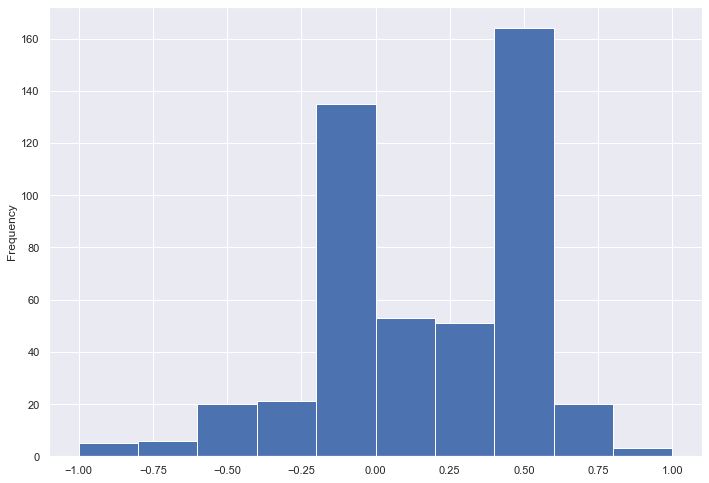

In [237]:
myModel_dataset['sentiment'].plot.hist()

# Plotting sentiment with price change

In [205]:
import seaborn as sns

In [211]:
def plot_sentiment_change(dataset):
    data=dataset[['sentiment', 'log_change']]
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.lineplot(data=data, palette="tab10", linewidth=1.5)

In [215]:
def plot_sentiment_change_slice(dataset):
    dataset = dataset[:100]
    data=dataset[['sentiment', 'log_change']]
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.lineplot(data=data, palette="tab10", linewidth=1.5)

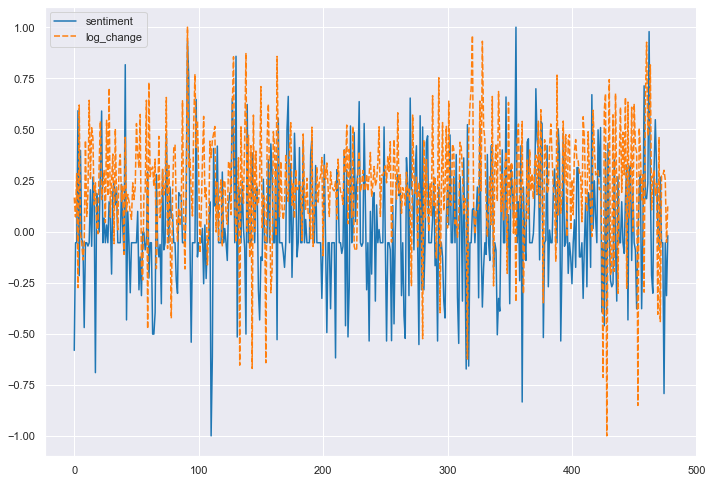

In [212]:
plot_sentiment_change(vader_dataset)

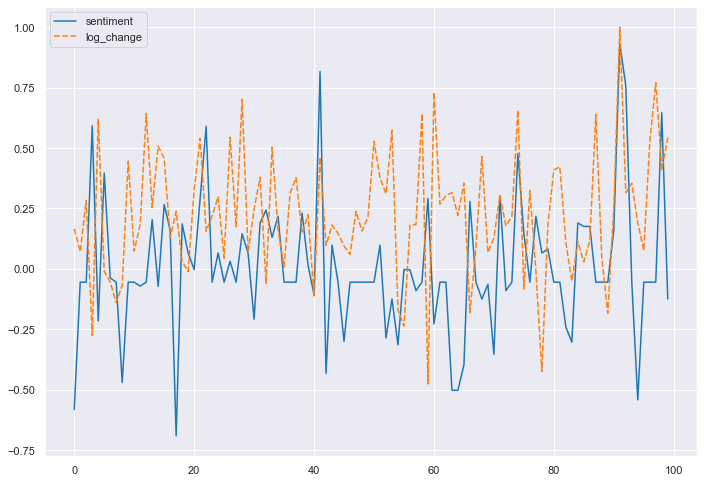

In [216]:
plot_sentiment_change_slice(vader_dataset)

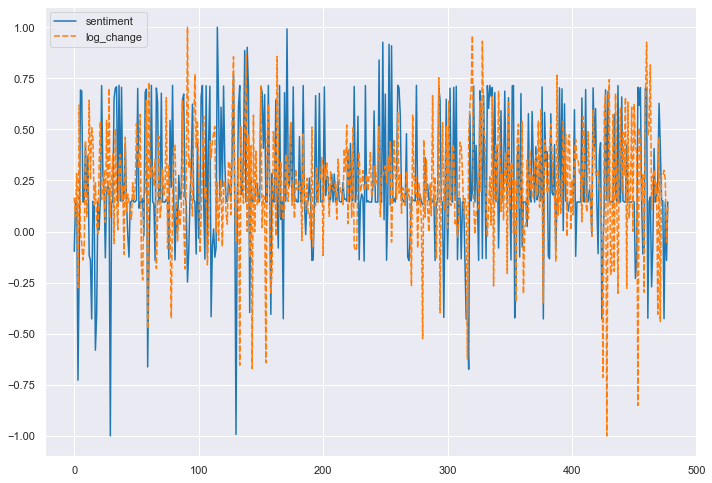

In [213]:
plot_sentiment_change(flair_dataset)

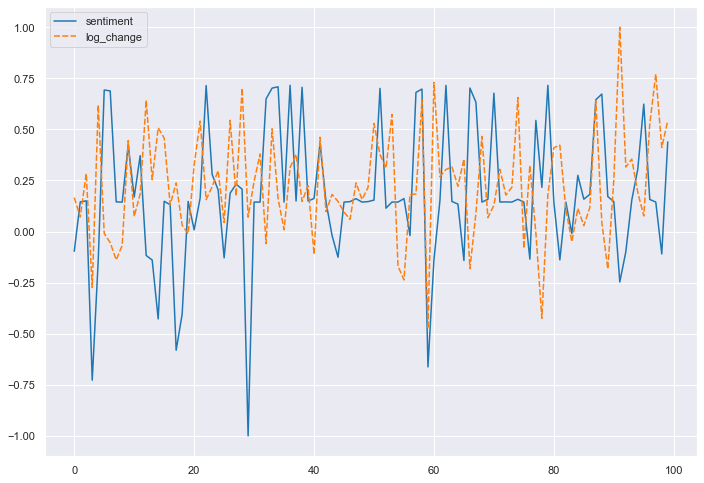

In [217]:
plot_sentiment_change_slice(flair_dataset)

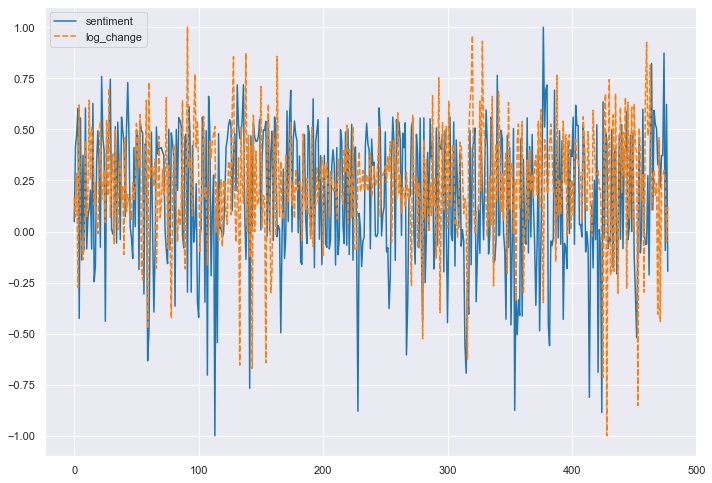

In [233]:
plot_sentiment_change(myModel_dataset)

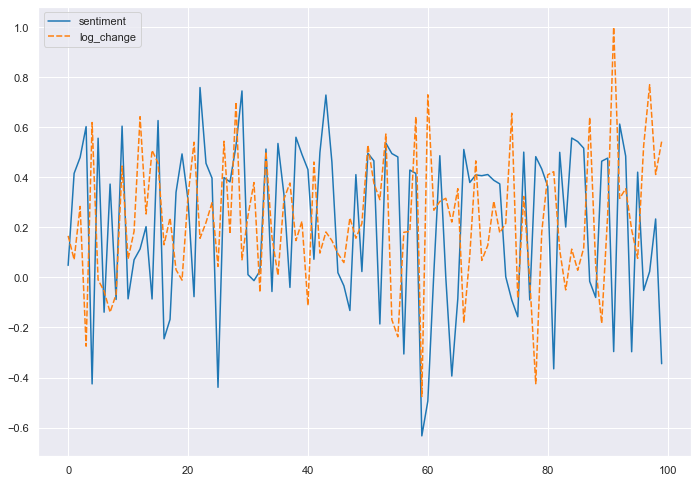

In [234]:
plot_sentiment_change_slice(myModel_dataset)